In [1]:
#libraries importing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt #Visualization
import types
from botocore.client import Config
import ibm_boto3

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200220082531-0000
KERNEL_ID = fa08cb4e-27ea-46b1-858b-d5b68ad4cfd0


#---------------------Data importing

In [2]:
#Data set import from IBM Cloud Object Storage 
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_24e822878b1f43ada915892b5f4ba95e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DjzjweKn95NZ1AGf5htb40wQ7RGmKG_UiagreBSxKgFf',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_24e822878b1f43ada915892b5f4ba95e.get_object(Bucket='coursera-donotdelete-pr-wtgdiyd2rufcdd',Key='2019_nCoV_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [3]:
#dataset summary 
data.info()
#3  float64 columns and 4 categorical culumns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.5+ KB


In [5]:
#dataset summary 
data.describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


#---------------------Data Exploration-cleansing-converting-Correcting Completing

In [6]:
#convert Confirmed	Deaths	Recovered columns to int values
data['Confirmed']=data['Confirmed'].astype(int)
data['Deaths']=data['Deaths'].astype(int)
data['Recovered']=data['Recovered'].astype(int)

#Clean Data: remove serial number column 
data.drop(['Sno'], axis=1, inplace=True)
#Replace Mainland China with China
data.replace({'Country': 'Mainland China'}, 'China', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 7 columns):
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null int64
Deaths            1719 non-null int64
Recovered         1719 non-null int64
dtypes: int64(3), object(4)
memory usage: 94.1+ KB


In [7]:
#check if there is empty values
data.isnull().any()


Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [8]:
#Find rows with empty values
data[data.isnull().any(axis=1)]


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
35,01/22/2020 12:00:00,NaN,Japan,01/22/2020 12:00:00,2,0,0
36,01/22/2020 12:00:00,NaN,Thailand,01/22/2020 12:00:00,2,0,0
37,01/22/2020 12:00:00,NaN,South Korea,01/22/2020 12:00:00,1,0,0
73,01/23/2020 12:00:00,NaN,Japan,01/23/2020 12:00:00,1,0,0
74,01/23/2020 12:00:00,NaN,Thailand,01/23/2020 12:00:00,3,0,0
75,01/23/2020 12:00:00,NaN,South Korea,01/23/2020 12:00:00,1,0,0
76,01/23/2020 12:00:00,NaN,Singapore,01/23/2020 12:00:00,1,0,0
77,01/23/2020 12:00:00,NaN,Philippines,01/23/2020 12:00:00,0,0,0
78,01/23/2020 12:00:00,NaN,Malaysia,01/23/2020 12:00:00,0,0,0
79,01/23/2020 12:00:00,NaN,Vietnam,01/23/2020 12:00:00,2,0,0


In [9]:
#Most affected country and chinese province
print('Most affected countries are:',data.groupby('Country')['Confirmed'].sum().sort_values(ascending=False))
#Most affected Province/State
print('Most affected countries are:',data.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False))
print('Most affected country is China with:',data.loc[data['Country'] == 'China'].sum())

Most affected countries are: Country
China                   773500
Others                    2161
Singapore                  797
Hong Kong                  681
Japan                      591
Thailand                   581
South Korea                444
Taiwan                     320
Malaysia                   303
Australia                  284
Germany                    252
US                         250
Vietnam                    225
Macau                      209
France                     186
United Arab Emirates       126
Canada                     116
UK                          93
India                       50
Italy                       49
Philippines                 47
Russia                      36
Spain                       27
Nepal                       24
Sri Lanka                   22
Cambodia                    22
Finland                     20
Sweden                      18
Belgium                     14
Egypt                        4
Ivory Coast                  0
Me

In [10]:
#No.of Countries  affected with Virus
data.Country.nunique()

33

#---------------------Dataset Visualisation

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,9)
plt.figure(figsize=(16,9));


<Figure size 1152x648 with 0 Axes>

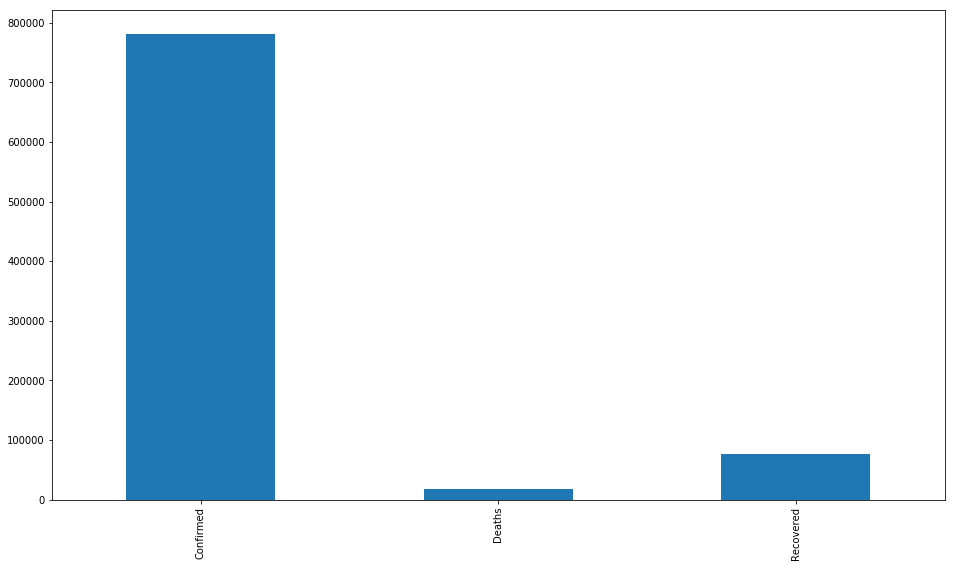

In [12]:
data[['Confirmed', 'Deaths', 'Recovered']].sum().plot(kind='bar')

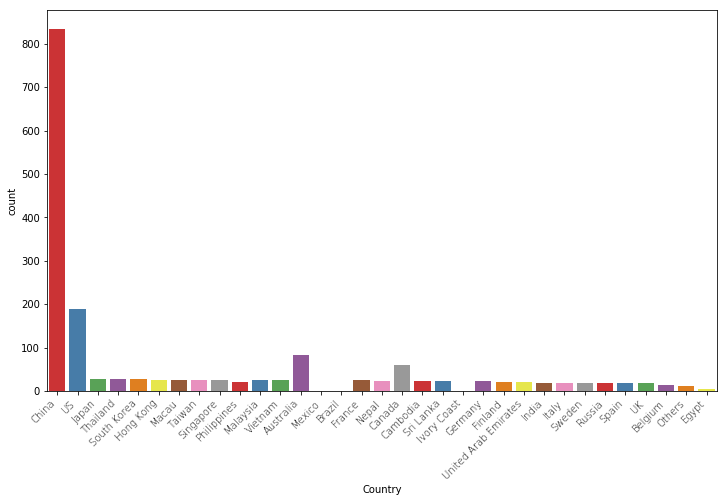

In [14]:
plt.figure(figsize=(12,7))
chart = sns.countplot(data=data, x='Country', palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light');

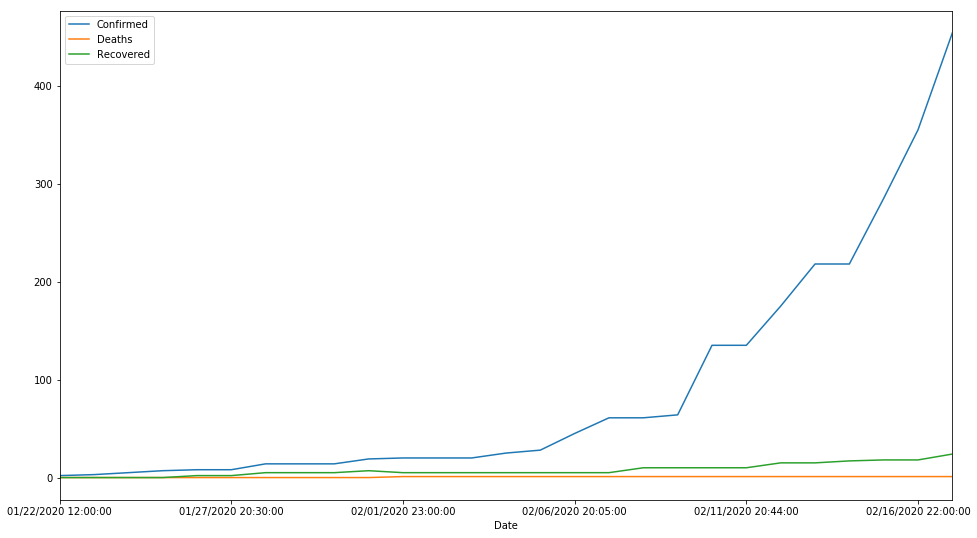

In [15]:
data[data.Country != 'China'].groupby('Date').max().plot(kind='line') #except China

In [16]:
#No of persons with confirmed virus is icreasing, Good news: No of death is stable.

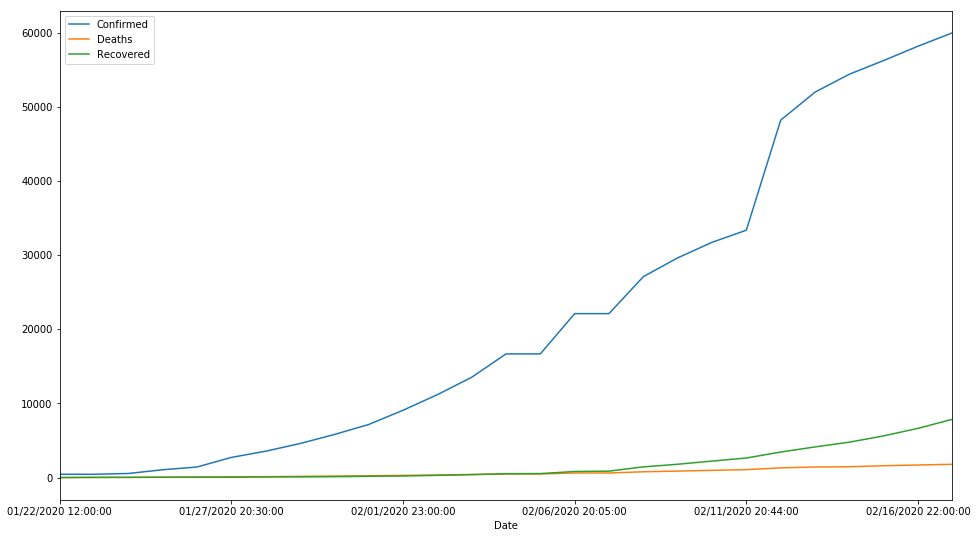

In [17]:
data[data.Country == 'China'].groupby('Date').max().plot(kind='line') #In China

#---------------------Prediction --

In [123]:
confirmed_training_dataset = pd.DataFrame(data.groupby('Date')['Confirmed'].sum().reset_index()).rename(columns={'Date': 'x', 'Confirmed': 'y'})
X_confirmed = np.array(confirmed_training_dataset.y)
#X_confirmed=X_confirmed[:, None]
X_confirmed_train=X_confirmed[:20, None]
X_confirmed_test=X_confirmed[20:, None]

In [124]:
death_training_dataset = pd.DataFrame(data.groupby('Date')['Deaths'].sum().reset_index()).rename(columns={'Date': 'x', 'Deaths': 'y'})
X_death = np.array(death_training_dataset.y)
#X_death=X_death[:, None]
X_death_train=X_death[:20, None]
X_death_test=X_death[20:, None]

In [125]:
recovered_training_dataset = pd.DataFrame(data.groupby('Date')['Recovered'].sum().reset_index()).rename(columns={'Date': 'x', 'Recovered': 'y'})
X_recovered = np.array(recovered_training_dataset.y)
#X_recovered=X_recovered[:, None]
X_recovered_train=X_recovered[:20, None]
X_recovered_test=X_recovered[20:, None]


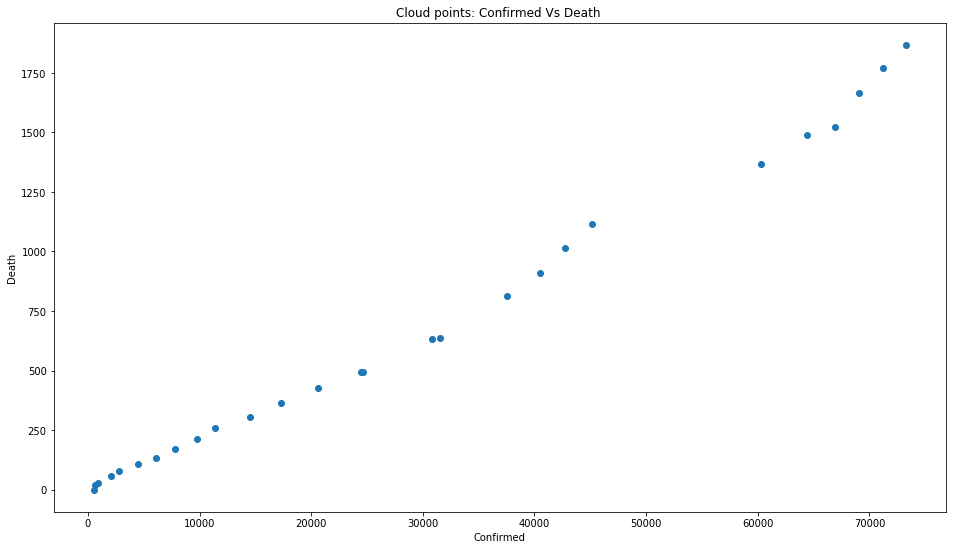

In [126]:
#Visualization of cloud points Confirmed Vs Death
plt.scatter(X_confirmed,X_death)

plt.title('Cloud points: Confirmed Vs Death ')
plt.xlabel('Confirmed')
plt.ylabel('Death')

plt.show()

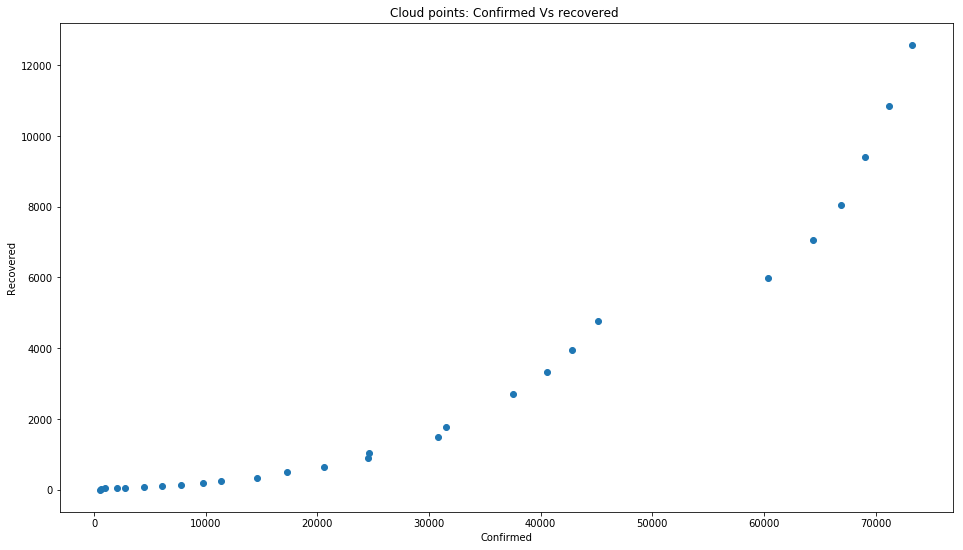

In [127]:
#Visualization of cloud points Confirmed Vs Recovered
plt.scatter(X_confirmed,X_recovered)
plt.title('Cloud points: Confirmed Vs recovered ')
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.show()

In [128]:
# Fit linear model
from sklearn.linear_model import LinearRegression
reg_death = LinearRegression().fit(X_confirmed_train, X_death_train)
reg_recovered = LinearRegression().fit(X_confirmed_train, X_recovered_train)

In [131]:
#Prediction
reg_death.predict(X_death_test)

array([[20.5960935 ],
       [26.11353641],
       [28.79592961],
       [29.493788  ],
       [32.61234269],
       [34.88038246],
       [37.01757379]])

In [132]:
reg_recovered.predict(X_recovered_test)

array([[-34.24625874],
       [ 58.91117391],
       [142.25035432],
       [219.09557263],
       [322.45780288],
       [436.10213981],
       [568.91912678]])

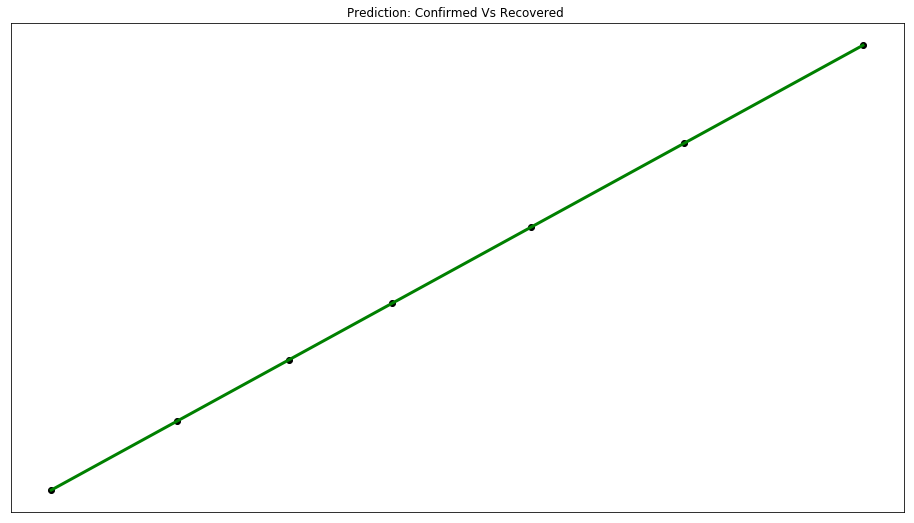

In [150]:
## Plot outputs
plt.title('Prediction: Confirmed Vs Recovered ')
plt.scatter(X_recovered_test, X_recovered_test,  color='black')
plt.plot(X_recovered_test, X_recovered_test, color='green', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

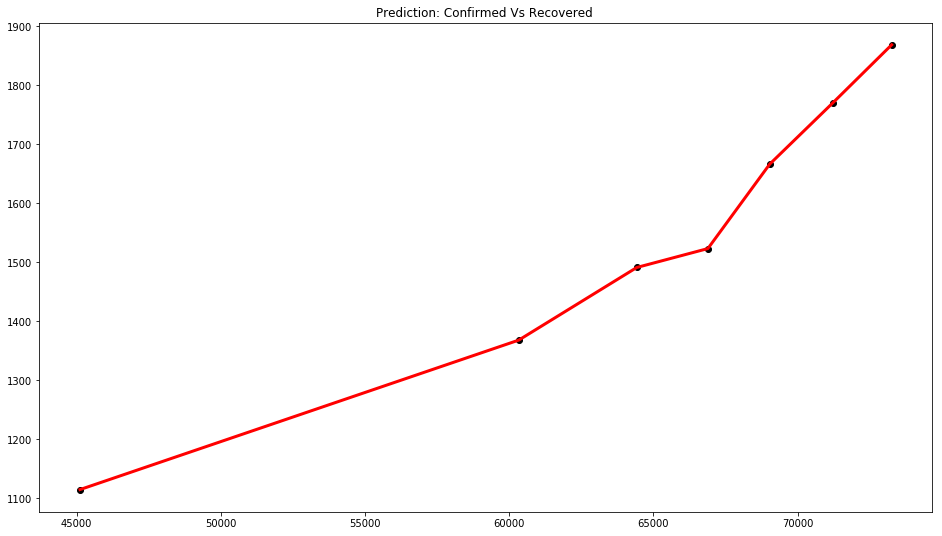

In [149]:
## Plot outputs
plt.title('Prediction: Confirmed Vs Recovered ')
plt.scatter(X_confirmed_test, X_death_test,  color='black')
plt.plot(X_confirmed_test, X_death_test, color='red', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [145]:
reg_death.predict([[1000000],])#predict the death rate when No. of persons with confirmed coronavirus is 1M

array([[21804.35484405]])

In [147]:
reg_recovered.predict([[1000000],])#predict the recovering rate when No. of persons with confirmed coronavirus is 1M

array([[76905.21180552]])

#Good predicted news!!! 